# Blind Vision

Safe


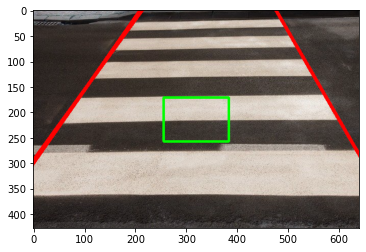

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString, Point


def check_interception(boundary_lines, object_lines):
    """
    Check if the object in the image is colliding with
    the boundaries.
    """
    for i in boundary_lines:
        line1 =  LineString([i[0], i[1]])
        for j in object_lines:
            line2 =  LineString([j[0], j[1]])
            ip = line1.intersection(line2)
            # If there is an interception
            if not ip.is_empty:
                return True
    return False


# Read in the image
img = cv2.imread('imgs/zebra_5.jpg', cv2.IMREAD_COLOR)

# Convert to Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Perform Gaussian blur
"""
Adding this blur has significantly helped
"""
blur = cv2.GaussianBlur(gray, (5,5), 0)

# Find edges with Canny Edge Detection
"""
Tweaking the canny parameters was vital to the HoughLines output
"""
edges = cv2.Canny(blur, 200, 410)

# Using Houghlines ---
# Detect lines using Hough Lines Transform
lines = cv2.HoughLines(image=edges, rho=1, theta=np.pi/180, threshold=80)

# Store the lines that are boundaries
boundaries = []

if lines is not None:
    for line in lines:
        rho = line[0][0] # Extract the line's rho (distance from 0,0)
        theta = line[0][1] # Extract the line's theta (rotation angle in radians) 
        # Only choose lines that are verticle
        # less than 0.7 rad (around 30 deg)
        # greater than 2.5 rad (around 150 deg)
        if theta < 0.7 or theta > 2.5:
            
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            point1 = (x1, y1)
            point2 = (x2, y2)
            boundaries.append([point1, point2])

            # Draw lines between points
            cv2.line(img, point1, point2, (255, 0, 0), 5)
            
    # Placing centre point
    # Get dimensions of the image
    y, x, _ = img.shape

    y_mid = round(y / 2)
    x_mid = round (x / 2)
    y_scale = round(y / 10)
    x_scale = round(x / 10)
    
    x1 = x_mid - x_scale 
    x2 = x_mid + x_scale
    y1 = y_mid - y_scale
    y2 = y_mid + y_scale
    
    # Test out of boundary
#     x1 = 100
#     x2 = 200
#     y1 = 100
#     y2 = 200
    
    c_point1 = (x1, y1)
    c_point2 = (x2, y2)
    
    # The lines that make up the rectangle
    rect_lines = [
        [(x1, y1), (x1, y2)], # left of rec
        [(x2, y1), (x2, y2)], # right of rec
        [(x1, y2), (x2, y2)], # top of rec
        [(x1, y1), (x2, y1)], # bottom of rec
    ]
    
    # Check if safe or dangerous
    danger = check_interception(boundaries, rect_lines)
    
    if danger:
        print("Danger!")
        cv2.rectangle(img, c_point1, c_point2, (255,100,0), 3) # Red/orange rectangle
    else:
        print("Safe")
        cv2.rectangle(img, c_point1, c_point2, (0,255,0), 3) # Green rectangle
    
    # Display the lines on the image
    plt.imshow(img)
    
else:
    print("No lines")
    